## PRODUISEZ UNE ÉTUDE DE MARCHÉ AVEC R OU PYTHON  



L'entreprise "La poule qui chante" souhaite se développer à l'international. 

Notre mission est de proposer une première analyse des groupements de pays que l'on pourrait cibler pour exporter les poulets.

Dans un premier temps nous procederons au nettoyage et à l'analyse exploratoire de nos données (notebook1), puis dans un second temps nous réaliserons un clustering de nos données pour identifier des groupes de pays avec des caractéristiques similaires (notebook2). 

Pour mener à bien notre mission nous utiliserons des données issues du site de la FAO:
-  Population: https://www.fao.org/faostat/fr/#data/OA
-  Disponibilité alimentaire: https://www.fao.org/faostat/fr/#data/FBS
-  Disponibilité de protéines: https://www.fao.org/faostat/fr/#data/FBS
-  Données PIB par habitants: https://www.fao.org/faostat/fr/#data/MK
-  Données stabilité politique: https://www.fao.org/faostat/fr/#data/FS

À partir de ces données brutes nous avons choisi ou créé les variables suivantes qui caractériseront nos individus (pays)
- Population (en milliers d'hab)
- Disponibilité intérieure (en milliers de tonnes)
- Disponibilité alimentaire (en kcal/personne/jour)
- Taux de dépendance aux importations (TDI en %)
- Ratio de protéines d'origine animale (Ratio_prot_anim en %)
- Stabilité politique
- Produit intérieur brut par habitant (PIB_hab en $)



## Sommaire

* [Étapes préliminaires](#Chapter1)
    * [Importation des librairies](#section_1_1)
    * [Importation des données](#section_1_2)
* [Nettoyage des données](#chapter2)
    * [Population](#section_2_1)
    * [Disponibilité alimentaire](#section_2_2)
        * [Calcul du taux de dépendance aux importations](#section_2_2_1)
    * [Ratio protéine animale](#section_2_3)
    * [Stabilité politique](#section_2_4)
    * [Produit intérieur brut](#section_2_5)
* [Jointures](#chapter3)
    * [Entre df_population et df_dispo_alim](#section_3_1)
    * [Ajout de df_ratio_prot](#section_3_2)
    * [Ajout de df_stabilité_pol](#section_3_3)
    * [Ajout de df_pib](#section_3_4)
* [Centrage et réduction des données](#chapter4)
* [Analyse en composantes principales](#chapter5)
    * [Cercle des corrélations](#section_5_1)
    * [Projection nuage des individus](#section_5_2)
* [Exportation des données](#chapter6)

## Étapes préliminaires <a class="anchor" id="chapter1"></a>

## Importation des librairies <a class="anchor" id="section_1_1"></a>

In [1]:
# Manipulation des données
import pandas as pd
import numpy as np

# Centrage-réduction des données et analyse en composantes principales
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Représentation graphique
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Importation des données <a class="anchor" id="section_1_2"></a>

In [2]:
Dispo_alim = pd.read_csv("C:/Users/jorda/P9/Data/DisponibiliteAlimentaire_2017.csv", sep = ',')
Population = pd.read_csv("C:/Users/jorda/P9/Data/Population_2000_2018.csv", sep = ',')

## Nettoyage des données <a class="anchor" id="chapter2"></a>

### Population <a class="anchor" id="section_2_1"></a>

In [3]:
Population.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


On supprime certaines colonnes qui n'ont pas d'informations pertinentes pour la suite.

In [4]:
# Suppression de colonnes
df_population = Population.drop(columns=["Code Domaine", "Domaine", "Code zone", 
                                 "Code Élément", "Élément", "Code Produit", "Produit", "Code année",
                                "Unité", "Symbole", "Description du Symbole", "Note"])
print(df_population.shape) # On affiche le nombre de lignes et de colonnes dans le dataframe
df_population.head(3)

(4411, 3)


,Zone,Année,Valeur
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770


In [5]:
# On affiche les informations sur le dataframe df_population
df_population.info()
print(" ")

# On regarde s'il y a des doublons au niveau des lignes
print("Il y a", df_population.duplicated().sum(), "lignes en doubles dans le dataframe.")
print(" ")

# On affiche le compte des valeurs uniques dans chaque colonne
print("Nombre de valeurs uniques par colonne:")
df_population.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    4411 non-null   object 
 1   Année   4411 non-null   int64  
 2   Valeur  4411 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 103.5+ KB
 
Il y a 0 lignes en doubles dans le dataframe.
 
Nombre de valeurs uniques par colonne:


Zone       238
Année       19
Valeur    4398
dtype: int64

Pour cette analyse on a choisi d'utiliser les données de 2017, on garde donc seulement les populations pour l'année 2017.

In [6]:
# On ne garde que les lignes correspondant à l'année 2017
df_population = df_population.loc[df_population["Année"] == 2017]

# Et on supprime la colonne "Année" qui ne contient plus que 2017
df_population = df_population.drop(columns=["Année"])
print(df_population.shape)
df_population.head(3)

(236, 2)


,Zone,Valeur
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169


On renomme les colonnes et on convertit la population.

In [7]:
# On renomme les noms de colonnes
df_population.rename(columns={"Zone": "Pays", "Valeur": "Population"}, inplace=True)

# On convertit en millions
df_population["Population"] = df_population["Population"]*1000

df_population.head(3)

,Pays,Population
17,Afghanistan,36296113.0
36,Afrique du Sud,57009756.0
55,Albanie,2884169.0


In [8]:
# Affichage nombre de lignes et colonnes
print(df_population.shape)

# Nombre de valeurs uniques par colonne
df_population.nunique()

(236, 2)


Pays          236
Population    236
dtype: int64

L'unicité des valeurs de la colonne "Pays" est respectée. Cette dernière est la clé primaire du dataframe df_population.

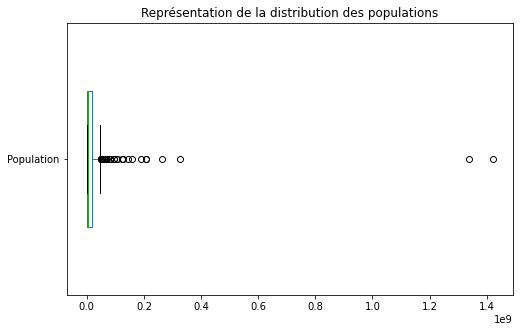

,Population
count,2.360000e+02
mean,3.198362e+07
std,1.318949e+08
min,7.930000e+02
25%,3.803032e+05
50%,5.203510e+06
75%,1.930842e+07
max,1.421022e+09


In [9]:
# Représentation en boîte à moustache des valeurs de la colonne 'Population'
plt.figure(figsize= (8, 5))
df_population.boxplot(column='Population', vert = False, widths=0.5)
plt.grid(False)
plt.title("Représentation de la distribution des populations")
plt.show()

# Données descriptives de la colonne population
df_population.describe()

In [10]:
# On affiche les pays avec des populations supérieures à 1 milliard
df_population.loc[df_population["Population"] > 1000000000]

,Pays,Population
823,"Chine, continentale",1.421022e+09
1952,Inde,1.338677e+09


Les populations de Chine continentale et d'Inde sont des outliers importants supèrieurs à 1 Milliard. Pour l'instant nous décidons de les garder dans notre jeu de données.

### Disponibilité alimentaire <a class="anchor" id="section_2_2"></a>

In [11]:
Dispo_alim.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées


On supprime certaines colonnes.

In [12]:
# Suppression des colonnes
df_dispo_alim = Dispo_alim.drop(columns=["Code Domaine", "Domaine", "Code zone", 
                                 "Code Élément", "Code Produit", "Code année",
                                "Unité", "Symbole", "Description du Symbole", "Année"])

# On renomme la colonne "Zone"
df_dispo_alim.rename(columns={"Zone": "Pays"}, inplace=True)

print(df_dispo_alim.shape)
df_dispo_alim.head(3)

(176600, 4)


,Pays,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2302.0
2,Afghanistan,Variation de stock,Blé et produits,-119.0


On ne garde que les lignes correspondant au produit "Viande de volailles".

In [13]:
# On garde seulement les lignes correspondant à la viande de volailles
df_dispo_alim = df_dispo_alim.loc[df_dispo_alim['Produit'] == "Viande de Volailles"]
df_dispo_alim.head(3)

# On supprime la colonne "Produit" qui ne contient qu'une valeur.
df_dispo_alim = df_dispo_alim.drop(columns=["Produit"])
df_dispo_alim.head(3)

,Pays,Élément,Valeur
651,Afghanistan,Production,28.0
652,Afghanistan,Importations - Quantité,29.0
653,Afghanistan,Variation de stock,0.0


On pivote la colonne "Élément"

In [14]:
# On pivote la table pour avoir les valeurs en lignes 
df_dispo_alim = pd.pivot_table(df_dispo_alim, values='Valeur', index=['Pays'],
                    columns=['Élément']).reset_index()
df_dispo_alim.head(3)

Élément,Pays,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0


In [15]:
# On supprime des colonnes
df_dispo_alim = df_dispo_alim.drop(columns=["Alimentation pour touristes", "Aliments pour animaux", "Autres utilisations (non alimentaire)",
                                            "Disponibilité alimentaire en quantité (kg/personne/an)", "Disponibilité de matière grasse en quantité (g/personne/jour)",
                                            "Nourriture", "Pertes", "Résidus", "Semences", "Traitement",
                                           "Disponibilité de protéines en quantité (g/personne/jour)"])

# On renomme certaines colonnes
df_dispo_alim.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)": "Disponibilité alimentaire",
                             "Importations - Quantité":"Importations", "Exportations - Quantité": "Exportations"}, inplace=True)
print(df_dispo_alim.shape)
df_dispo_alim.head(3)

(172, 7)


Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock
0,Afghanistan,5.0,57.0,NaN,29.0,28.0,0.0
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,0.0
2,Albanie,85.0,47.0,0.0,38.0,13.0,4.0


In [16]:
# On affiche les informations sur le dataframe df_dispo_alim
df_dispo_alim.info()
print(" ")

# On regarde s'il y a des doublons au niveau des lignes
print("Il y a", df_dispo_alim.duplicated().sum(), "lignes en doubles dans le dataframe.")
print(" ")

# On affiche le compte des valeurs uniques dans chaque colonne
print("Nombre de valeurs uniques par colonne:")
df_dispo_alim.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pays                       172 non-null    object 
 1   Disponibilité alimentaire  172 non-null    float64
 2   Disponibilité intérieure   170 non-null    float64
 3   Exportations               135 non-null    float64
 4   Importations               170 non-null    float64
 5   Production                 168 non-null    float64
 6   Variation de stock         169 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB
 
Il y a 0 lignes en doubles dans le dataframe.
 
Nombre de valeurs uniques par colonne:


Élément
Pays                         172
Disponibilité alimentaire    112
Disponibilité intérieure     135
Exportations                  50
Importations                  84
Production                   125
Variation de stock            55
dtype: int64

L'unicité des valeurs de la colonne "Pays" est respectée elle est la clé primaire du dataframe df_population.  

Il y a beaucoup de pays avec des valeurs manquantes pour les exportations (135 valeurs seulement sur 172). On utilise une équation du bilan alimentaire pour déterminer ces valeurs manquantes.

#### Exportation = Production + Importation + Variation de stocks - Disponibilité intérieure

In [17]:
# On stocke la formule dans une variable
export = df_dispo_alim["Production"] + df_dispo_alim["Importations"] + df_dispo_alim["Variation de stock"] - df_dispo_alim["Disponibilité intérieure"] 

# On rempli les valeurs manquantes par les résultats de l'équation pour chaque ligne
df_dispo_alim["Exportations"] = df_dispo_alim["Exportations"].fillna(export)
df_dispo_alim.head(3)

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production,Variation de stock
0,Afghanistan,5.0,57.0,0.0,29.0,28.0,0.0
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,0.0
2,Albanie,85.0,47.0,0.0,38.0,13.0,4.0


In [18]:
df_dispo_alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pays                       172 non-null    object 
 1   Disponibilité alimentaire  172 non-null    float64
 2   Disponibilité intérieure   170 non-null    float64
 3   Exportations               168 non-null    float64
 4   Importations               170 non-null    float64
 5   Production                 168 non-null    float64
 6   Variation de stock         169 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB


On a remplacé 33 valeurs manquantes

In [19]:
# On supprime la colonne "variation de stock"
df_dispo_alim.drop(columns=["Variation de stock"], inplace= True)

# On exclu les lignes où il reste des valeurs manquantes
df_dispo_alim.dropna(inplace= True)

df_dispo_alim.head(3)

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,Exportations,Importations,Production
0,Afghanistan,5.0,57.0,0.0,29.0,28.0
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0
2,Albanie,85.0,47.0,0.0,38.0,13.0


### Calcul du taux de dépendance aux importations (TDI) <a class="anchor" id="section_2_2_1"></a>

Maintenant nous pouvons calculer le taux de dépendance aux importations selon la formule suivante:

#### TDI = (Importations / (Production + Importations - Exportations)) * 100

In [20]:
# Calcul du TDI dans une nouvelle colonne
df_dispo_alim["TDI"] = round((df_dispo_alim["Importations"] / (df_dispo_alim["Production"] + df_dispo_alim["Importations"] - df_dispo_alim["Exportations"]))*100, 1)

# Suppression de colonnes
df_dispo_alim.drop(columns= ["Importations", "Exportations", "Production"], inplace=True)
df_dispo_alim.head(3)

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,TDI
0,Afghanistan,5.0,57.0,50.9
1,Afrique du Sud,143.0,2118.0,24.3
2,Albanie,85.0,47.0,74.5


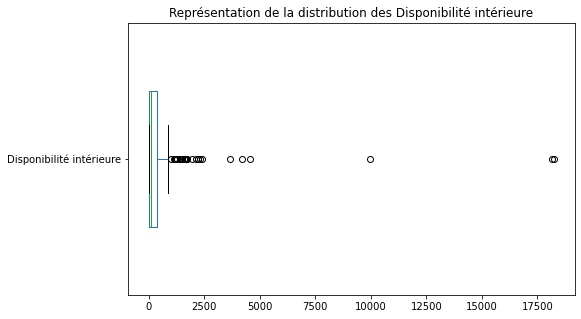

,Population
count,2.360000e+02
mean,3.198362e+07
std,1.318949e+08
min,7.930000e+02
25%,3.803032e+05
50%,5.203510e+06
75%,1.930842e+07
max,1.421022e+09


In [21]:
# Représentation en boîte à moustache des valeurs de la colonne 'Disponibilité intérieure'
plt.figure(figsize= (8, 5))
df_dispo_alim.boxplot(column='Disponibilité intérieure', vert = False, widths=0.5)
plt.grid(False)
plt.title("Représentation de la distribution des Disponibilité intérieure")
plt.show()

df_population.describe()

In [22]:
# Affichage des outliers supérieurs à 7500
df_dispo_alim.loc[df_dispo_alim["Disponibilité intérieure"] > 7500]

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,TDI
21,Brésil,204.0,9982.0,0.0
34,"Chine, continentale",59.0,18161.0,2.5
169,États-Unis d'Amérique,219.0,18266.0,0.7


À ce stade nous gardons les outliers.

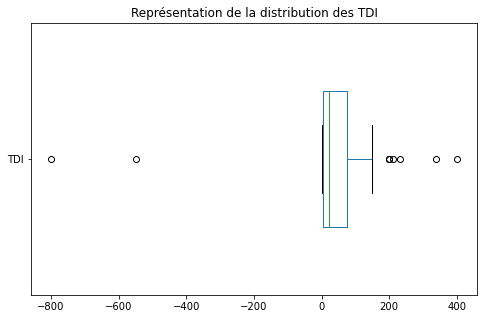

In [23]:
# Représentation en boîte à moustache des valeurs de la colonne 'TDI'
plt.figure(figsize= (8, 5))
df_dispo_alim.boxplot(column='TDI', vert = False, widths=0.5)
plt.grid(False)
plt.title("Représentation de la distribution des TDI")
plt.show()

In [24]:
# Affichage des outliers négatifs
df_dispo_alim.loc[df_dispo_alim["TDI"] < 0 ]

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,TDI
54,Gambie,12.0,8.0,-800.0
152,Timor-Leste,14.0,5.0,-550.0


On a deux outliers pour des TDI négatives. Étant donnés leur taux de dépendance aux importations extrêmement faible, ces deux pays (Gambie et Timor-Leste) ne sont pas intéressants et nous pouvons les supprimer du jeu de données.

In [25]:
liste = ["Gambie", "Timor-Leste"]
df_dispo_alim = df_dispo_alim.loc[~ df_dispo_alim["Pays"].isin(liste)]
print(df_dispo_alim.shape)

(166, 4)


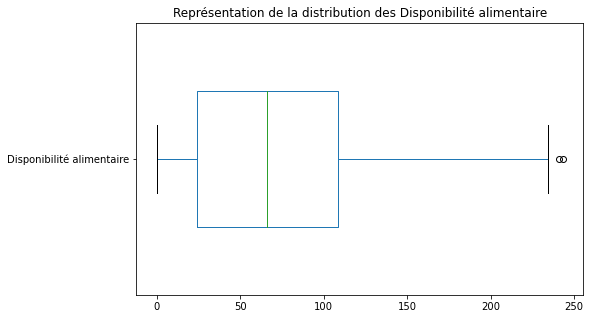

In [26]:
# Représentation en boîte à moustache des valeurs de la colonne 'Disponibilité alimentaire'
plt.figure(figsize= (8, 5))
df_dispo_alim.boxplot(column='Disponibilité alimentaire', vert = False, widths=0.5)
plt.grid(False)
plt.title("Représentation de la distribution des Disponibilité alimentaire")
plt.show()

In [27]:
# Affichage des outliers
df_dispo_alim.loc[df_dispo_alim["Disponibilité alimentaire"] > 240]

Élément,Pays,Disponibilité alimentaire,Disponibilité intérieure,TDI
134,Saint-Vincent-et-les Grenadines,243.0,8.0,128.6
135,Sainte-Lucie,241.0,11.0,90.9


On garde ces outliers dans le jeu de données.

### Calcul ratio disponibilité en protéine animale sur disponibilité totale en protéines <a class="anchor" id="section_2_3"></a>

In [28]:
# Importation des données sur les disponibilités de protéines pour l'année 2017
ratio_prot = pd.read_csv("C:/Users/jorda/P9/Data/Ratio_prot_animale.csv", sep = ',')
ratio_prot.head(3)

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Bilans Alimentaires (2010-),Afghanistan,Disponibilité de protéines en quantité (g/pers...,Total General,2017,g/personne/jour,59.50
1,Bilans Alimentaires (2010-),Afghanistan,Disponibilité de protéines en quantité (g/pers...,Produits Animaux,2017,g/personne/jour,11.16
2,Bilans Alimentaires (2010-),Afrique du Sud,Disponibilité de protéines en quantité (g/pers...,Total General,2017,g/personne/jour,79.70


In [29]:
# Suppression de colonnes
df_ratio_prot = ratio_prot.drop(columns=["Domaine", "Élément", "Année", "Unité"])

# On renomme certaines colonnes
df_ratio_prot = df_ratio_prot.rename(columns= {"Zone": "Pays", "Valeur": "Disponibilité protéines"})

# On pivote la table pour avoir les valeurs en lignes pour chaque produit
df_ratio_prot = pd.pivot_table(df_ratio_prot, values='Disponibilité protéines', index=['Pays'],
                    columns=['Produit']).reset_index()
df_ratio_prot.head(3)

Produit,Pays,Produits Animaux,Total General
0,Afghanistan,11.16,59.50
1,Afrique du Sud,35.44,79.70
2,Albanie,62.71,114.72


#### Ratio = (Produits Animaux / Total General) * 100

In [30]:
# Calcul du rapport protéine animale sur protéine total
df_ratio_prot["Ratio_prot_anim"] = round((df_ratio_prot["Produits Animaux"] / df_ratio_prot["Total General"])*100, 2)

# Suppression de colonnes
df_ratio_prot = df_ratio_prot.drop(columns=["Produits Animaux", "Total General"])
df_ratio_prot.head(3)

Produit,Pays,Ratio_prot_anim
0,Afghanistan,18.76
1,Afrique du Sud,44.47
2,Albanie,54.66


In [31]:
# On affiche les informations sur le dataframe df_ratio_prot
df_ratio_prot.info()
print(" ")

# On regarde s'il y a des doublons au niveau des lignes
print("Il y a", df_ratio_prot.duplicated().sum(), "lignes en doubles dans le dataframe.")
print(" ")

# On affiche le compte des valeurs uniques dans chaque colonne
print("Nombre de valeurs uniques par colonne:")
df_ratio_prot.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pays             180 non-null    object 
 1   Ratio_prot_anim  180 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB
 
Il y a 0 lignes en doubles dans le dataframe.
 
Nombre de valeurs uniques par colonne:


Produit
Pays               180
Ratio_prot_anim    179
dtype: int64

Il n'y a pas de valeurs manquantes et l'unicité de la clé primaire "Pays" est respectée.

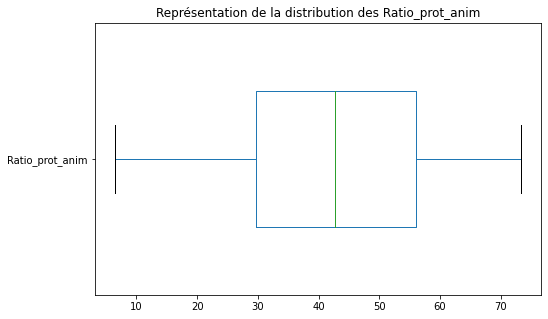

In [32]:
# Représentation en boîte à moustache des valeurs de la colonne 'Ratio_prot_anim'
plt.figure(figsize= (8, 5))
df_ratio_prot.boxplot(column='Ratio_prot_anim', vert = False, widths=0.5)
plt.grid(False)
plt.title("Représentation de la distribution des Ratio_prot_anim")
plt.show()

Il n'y a aucun outliers pour la variable "Ratio_prot_anim".

### Stabilité politique <a class="anchor" id="section_2_4"></a>

In [33]:
# Importation des données de stabilité politique pour l'année 2017
stabilité_politique = pd.read_csv("C:/Users/jorda/P9/Data/Stabilité_politique.csv", sep = ',')
stabilité_politique.head(3)

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Données de la sécurité alimentaire,Afghanistan,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,-2.80
1,Données de la sécurité alimentaire,Afrique du Sud,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,-0.28
2,Données de la sécurité alimentaire,Albanie,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,0.38


In [34]:
# Suppression de colonnes
df_stabilité_pol = stabilité_politique.drop(columns=["Domaine", "Élément", "Produit", "Année", "Unité"])

# On renomme les noms de colonnes
df_stabilité_pol = df_stabilité_pol.rename(columns={"Zone": "Pays", "Valeur": "Stabilité politique"})

df_stabilité_pol.head(3)

,Pays,Stabilité politique
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38


In [35]:
# On affiche les informations sur le dataframe Population
df_stabilité_pol.info()
print(" ")

# On regarde s'il y a des doublons au niveau des lignes
print("Il y a", df_stabilité_pol.duplicated().sum(), "lignes en doubles dans le dataframe.")
print(" ")

# On affiche le compte des valeurs uniques dans chaque colonne
print("Nombre de valeurs uniques par colonne:")
df_stabilité_pol.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pays                 197 non-null    object 
 1   Stabilité politique  197 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB
 
Il y a 0 lignes en doubles dans le dataframe.
 
Nombre de valeurs uniques par colonne:


Pays                   197
Stabilité politique    147
dtype: int64

Il n'y a pas de valeurs manquantes et l'unicité de la clé primaire "Pays" est respectée.

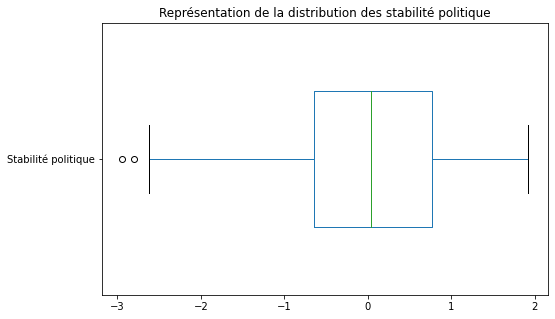

,Stabilité politique
count,197.000000
mean,-0.061777
std,0.994815
min,-2.940000
25%,-0.650000
50%,0.040000
75%,0.770000
max,1.920000


In [36]:
# Représentation en boîte à moustache des valeurs de la colonne 'Stabilité politique'
plt.figure(figsize= (8, 5))
df_stabilité_pol.boxplot(column='Stabilité politique', vert = False, widths=0.5)
plt.grid(False)
plt.title("Représentation de la distribution des stabilité politique")
plt.show()

df_stabilité_pol.describe()

In [37]:
# Affichage des outliers
df_stabilité_pol.loc[df_stabilité_pol["Stabilité politique"] < -2.7]

,Pays,Stabilité politique
0,Afghanistan,-2.80
194,Yémen,-2.94


De la même manière que pour le TDI précédement, ici nous décidons de supprimer les deux pays qui ont des indices de stabilité poplitique extrêmement faibles car cela les rend incompatibles avec notre objectif. 

In [38]:
# On met à jour le dataframe sans les outliers
liste = ["Afghanistan", "Yémen"]
df_stabilité_pol = df_stabilité_pol.loc[~ df_stabilité_pol["Pays"].isin(liste)]
print(df_stabilité_pol.shape)

(195, 2)


### Produit intérieur brut <a class="anchor" id="section_2_5"></a>

In [39]:
# Importation des données du PIB par habitant pour l'année 2017
PIB = pd.read_csv("C:/Users/jorda/P9/Data/PIB.csv", sep = ',')
PIB.head(3)

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Indicateurs macro,Afghanistan,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,520.616409
1,Indicateurs macro,Afrique du Sud,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,6121.876572
2,Indicateurs macro,Albanie,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,4514.204908


In [40]:
# Suppression de colonnes
df_pib = PIB.drop(columns=["Domaine", "Élément", "Produit", "Année", "Unité"])

# On renomme les noms de colonnes
df_pib = df_pib.rename(columns={"Zone": "Pays", "Valeur": "PIB_hab"})

df_pib.head(3)

,Pays,PIB_hab
0,Afghanistan,520.616409
1,Afrique du Sud,6121.876572
2,Albanie,4514.204908


In [41]:
# On affiche les informations sur le dataframe Population
df_pib.info()
print(" ")

# On regarde s'il y a des doublons au niveau des lignes
print("Il y a", df_pib.duplicated().sum(), "lignes en doubles dans le dataframe.")
print(" ")

# On affiche le compte des valeurs uniques dans chaque colonne
print("Nombre de valeurs uniques par colonne:")
df_pib.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pays     211 non-null    object 
 1   PIB_hab  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB
 
Il y a 0 lignes en doubles dans le dataframe.
 
Nombre de valeurs uniques par colonne:


Pays       211
PIB_hab    211
dtype: int64

Pas de valeurs manquantes dans ce dataframe et l'unicité de la clé "Pays" est respectée.

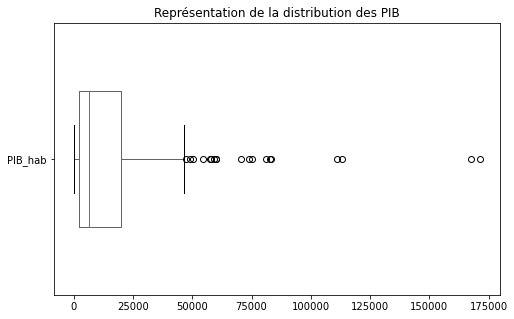

,PIB_hab
count,211.000000
mean,16934.384856
std,25494.984628
min,111.048078
25%,2132.827928
50%,6376.707362
75%,20073.940387
max,171278.066389


In [42]:
# Représentation en boîte à moustache des valeurs de la colonne 'PIB'
plt.figure(figsize= (8, 5))
df_pib.boxplot(column='PIB_hab', vert = False, widths=0.5)
plt.grid(False)
plt.title("Représentation de la distribution des PIB")
plt.show()

df_pib.describe()

Il y a plusieurs outliers que l'on décide de garder dans notre jeu de données.

## Jointures <a class="anchor" id="chapter3"></a>

#### Jointure entre df_population et df_dispo_alim <a class="anchor" id="section_3_1"></a>

In [43]:
# Jointure
df_jointure1 = pd.merge(df_population, df_dispo_alim, left_on="Pays", right_on= "Pays", how = "outer", indicator=True)

print(df_jointure1.shape)
df_jointure1.head(3)

(236, 6)


,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,_merge
0,Afghanistan,36296113.0,5.0,57.0,50.9,both
1,Afrique du Sud,57009756.0,143.0,2118.0,24.3,both
2,Albanie,2884169.0,85.0,47.0,74.5,both


In [44]:
# On affiche les lignes qui n'ont pas trouvé de correspondance dans l'un des dataframe
df_jointure1.loc[df_jointure1["_merge"] != "both"]

,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,_merge
5,Andorre,77001.0,NaN,NaN,NaN,left_only
7,Anguilla,14584.0,NaN,NaN,NaN,left_only
9,Antilles néerlandaises (ex),275186.0,NaN,NaN,NaN,left_only
13,Aruba,105366.0,NaN,NaN,NaN,left_only
18,Bahreïn,1494076.0,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...
210,Soudan du Sud,10910763.0,NaN,NaN,NaN,left_only
219,Timor-Leste,1243258.0,NaN,NaN,NaN,left_only
221,Tokélaou,1300.0,NaN,NaN,NaN,left_only
222,Tonga,101998.0,NaN,NaN,NaN,left_only


In [45]:
# On vérifie si il y des valeurs "right_only" dans la colonne "_merge"
df_jointure1.loc[df_jointure1["_merge"] == "right_only"]

,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,_merge


Il y a 70 pays de df_population qui n'ont pas trouvé de correspondance dans df_dispo_alim.  

On décide de les exclure.

In [46]:
# On supprime les lignes qui n'ont pas trouvé de correspondance
df_jointure1.dropna(inplace=True)

# On supprime la colonne "_merge"
df_jointure1 = df_jointure1.drop(columns=["_merge"])

print(df_jointure1.shape)

(166, 5)


#### On ajoute df_ratio_prot <a class="anchor" id="section_3_2"></a>

In [47]:
# Jointure
df_jointure2 = pd.merge(df_jointure1, df_ratio_prot, left_on="Pays", right_on= "Pays", how = "outer", indicator=True)
print(df_jointure2.shape)
df_jointure2.head(3)

(180, 7)


,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,_merge
0,Afghanistan,36296113.0,5.0,57.0,50.9,18.76,both
1,Afrique du Sud,57009756.0,143.0,2118.0,24.3,44.47,both
2,Albanie,2884169.0,85.0,47.0,74.5,54.66,both


In [48]:
# On affiche les lignes qui n'ont pas trouvé de correspondance dans l'un des dataframe
df_jointure2.loc[df_jointure2["_merge"] != "both"]

,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,_merge
166,Burundi,NaN,NaN,NaN,NaN,6.46,right_only
167,Chine,NaN,NaN,NaN,NaN,39.10,right_only
168,Comores,NaN,NaN,NaN,NaN,27.38,right_only
169,Djibouti,NaN,NaN,NaN,NaN,21.60,right_only
170,Gambie,NaN,NaN,NaN,NaN,28.35,right_only
171,Libye,NaN,NaN,NaN,NaN,37.42,right_only
172,Maldives,NaN,NaN,NaN,NaN,60.00,right_only
173,Ouzbékistan,NaN,NaN,NaN,NaN,42.68,right_only
174,Papouasie-Nouvelle-Guinée,NaN,NaN,NaN,NaN,56.20,right_only
175,République arabe syrienne,NaN,NaN,NaN,NaN,30.17,right_only


In [49]:
# On supprime les lignes qui n'ont pas trouvé de correspondance
df_jointure2.dropna(inplace=True)

# On supprime la colonne "_merge"
df_jointure2 = df_jointure2.drop(columns=["_merge"])

print(df_jointure2.shape)

(166, 6)


#### On ajoute df_stabilité_pol <a class="anchor" id="section_3_3"></a>

In [50]:
# Jointure
df_jointure3 = pd.merge(df_jointure2, df_stabilité_pol, left_on="Pays", right_on= "Pays", how = "outer", indicator=True)
print(df_jointure3.shape)
df_jointure3.head(3)

(200, 8)


,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,_merge
0,Afghanistan,36296113.0,5.0,57.0,50.9,18.76,NaN,left_only
1,Afrique du Sud,57009756.0,143.0,2118.0,24.3,44.47,-0.28,both
2,Albanie,2884169.0,85.0,47.0,74.5,54.66,0.38,both


In [51]:
# On affiche les lignes qui n'ont pas trouvé de correspondance dans l'un des dataframe
df_jointure3.loc[df_jointure3["_merge"] != "both"]

,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,_merge
0,Afghanistan,3.629611e+07,5.0,57.0,50.9,18.76,NaN,left_only
33,"Chine, continentale",1.421022e+09,59.0,18161.0,2.5,38.71,NaN,left_only
112,Nouvelle-Calédonie,2.771500e+05,136.0,11.0,75.0,58.25,NaN,left_only
123,Polynésie française,2.761020e+05,167.0,15.0,93.8,64.77,NaN,left_only
163,Yémen,2.783482e+07,30.0,246.0,31.7,18.93,NaN,left_only
166,Andorre,NaN,NaN,NaN,NaN,NaN,1.42,right_only
167,Bahreïn,NaN,NaN,NaN,NaN,NaN,-0.96,right_only
168,Bermudes,NaN,NaN,NaN,NaN,NaN,1.00,right_only
169,Bhoutan,NaN,NaN,NaN,NaN,NaN,1.12,right_only
170,Brunéi Darussalam,NaN,NaN,NaN,NaN,NaN,1.16,right_only


La Chine continentale, la Nouvelle-Calédonie et la Polynésie française n'ont pas trouvé de correspondance dans df_stabilité_pol.  

On attribu à la Chine continentale la stabilité politique moyenne de Hong-Kong, Macao et Taiwan.

In [52]:
# On sélectionne les lignes avec la mention "Chine"
df_chine = df_jointure3.loc[df_jointure3["Pays"].str.contains("Chine")]
df_chine

,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,_merge
31,Chine - RAS de Hong-Kong,7.306322e+06,210.0,280.0,338.4,73.29,0.83,both
32,Chine - RAS de Macao,6.225850e+05,142.0,19.0,88.5,65.25,1.43,both
33,"Chine, continentale",1.421022e+09,59.0,18161.0,2.5,38.71,NaN,left_only
34,"Chine, Taiwan Province de",2.367455e+07,126.0,785.0,20.0,51.00,0.86,both


In [53]:
# On stocke dans une variable la stabilité politique moyenne de Hong-Kong, Macao et Taiwan
moy_stab = df_chine["Stabilité politique"].mean()

# On attribue la valeur à la Chine continentale
df_jointure3["Stabilité politique"][33] = moy_stab

# On vérifie que l'attribution est réussie
df_jointure3.loc[df_jointure3["Pays"] == "Chine, continentale"]

C:\Users\jorda\AppData\Local\Temp/ipykernel_62928/1394027493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jointure3["Stabilité politique"][33] = moy_stab


,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,_merge
33,"Chine, continentale",1.421022e+09,59.0,18161.0,2.5,38.71,1.04,left_only


Les autres lignes qui n'ont pas trouvé de correspondance lors de la jointure sont exclu du dataframe.

In [54]:
# On supprime les lignes qui n'ont pas trouvé de correspondance
df_jointure3.dropna(inplace=True)

# On supprime la colonne "_merge"
df_jointure3 = df_jointure3.drop(columns=["_merge"])

print(df_jointure3.shape)

(162, 7)


#### On ajoute ensuite df_pib à df_jointure3 <a class="anchor" id="section_3_4"></a>

In [55]:
# Jointure
df_jointure4 = pd.merge(df_jointure3, df_pib, left_on="Pays", right_on= "Pays", how = "outer", indicator=True)
print(df_jointure4.shape)
df_jointure4.head(3)

(212, 9)


,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab,_merge
0,Afrique du Sud,57009756.0,143.0,2118.0,24.3,44.47,-0.28,6121.876572,both
1,Albanie,2884169.0,85.0,47.0,74.5,54.66,0.38,4514.204908,both
2,Algérie,41389189.0,22.0,277.0,0.7,29.24,-0.92,4109.696001,both


In [56]:
# Affichage des lignes qui n'ont pas trouvé de correspondance
df_jointure4.loc[df_jointure4["_merge"] != "both"]

,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab,_merge
33,"Chine, Taiwan Province de",23674546.0,126.0,785.0,20.0,51.0,0.86,NaN,left_only
162,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,520.616409,right_only
163,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,38962.613799,right_only
164,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,19271.499970,right_only
165,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,29349.412216,right_only
166,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,23742.959101,right_only
167,Bermudes,NaN,NaN,NaN,NaN,NaN,NaN,113281.987026,right_only
168,Bhoutan,NaN,NaN,NaN,NaN,NaN,NaN,3286.598606,right_only
169,Brunéi Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,28572.292244,right_only
170,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,304.592321,right_only


Il manque le PIB pour Taïwan, on lui attribue la moyenne de deux valeurs trouvées sur le web.

In [57]:
# On attribue la valeur de PIB à Taiwan
df_jointure4['PIB_hab'] = df_jointure4['PIB_hab'].fillna(24317.5) 

# On vérifie que l'attribution est réussie
df_jointure4.loc[df_jointure4["Pays"] == "Chine, Taiwan Province de"]

,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab,_merge
33,"Chine, Taiwan Province de",23674546.0,126.0,785.0,20.0,51.0,0.86,24317.5,left_only


Les autres lignes qui n'ont pas trouvé de correspondance lors de la jointure sont exclu du dataframe.

In [58]:
# On supprime les lignes qui n'ont pas trouvé de correspondance
df_jointure4.dropna(inplace=True)

# On supprime la colonne "_merge"
df_final = df_jointure4.drop(columns=["_merge"])

print(df_final.shape)
df_final.head()

(162, 8)


,Pays,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab
0,Afrique du Sud,57009756.0,143.0,2118.0,24.3,44.47,-0.28,6121.876572
1,Albanie,2884169.0,85.0,47.0,74.5,54.66,0.38,4514.204908
2,Algérie,41389189.0,22.0,277.0,0.7,29.24,-0.92,4109.696001
3,Allemagne,82658409.0,71.0,1739.0,49.2,60.33,0.59,44651.829102
4,Angola,29816766.0,35.0,319.0,86.8,30.81,-0.38,4095.811686


Plus tôt dans le nettoyage, nous avons constaté d'importants outliers sur les variables Population et Disponibilité intérieure. Étant donné que les méthodes (clustering et ACP) utilisées par la suite sont sensibles aux outliers, nous décidons de créer un nouveau dataframe avec les pays outliers et retirer ces derniers du dataframe final.

In [59]:
# On crée un dataframe avec les outliers Chine continentale, Brésil, États-Unis et Inde.
df_outliers = df_final.loc[df_final["Pays"].isin(["Chine, continentale", "Inde", "Brésil", "États-Unis d'Amérique"])]
df_outliers.set_index("Pays", inplace=True)

# On met à jour le df_final sans les outliers
df_final = df_final.loc[~ df_final["Pays"].isin(["Chine, continentale", "Inde", "Brésil", "États-Unis d'Amérique"])]

df_outliers

,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab
Pays,,,,,,,
Brésil,2.078338e+08,204.0,9982.0,0.0,56.45,-0.47,9928.675992
"Chine, continentale",1.421022e+09,59.0,18161.0,2.5,38.71,1.04,8663.126784
États-Unis d'Amérique,3.250848e+08,219.0,18266.0,0.7,64.72,0.29,59921.674703
Inde,1.338677e+09,7.0,3661.0,0.0,23.31,-0.76,1960.390340


## Centrage et réduction des données <a class="anchor" id="chapter4"></a>

Avant de procéder à l'analyse en composantes principales et au clustering, il est nécessaire de centrer et réduire nos données pour rendre comparables nos variables entre elles. Pour chaque valeur on lui soustrait la moyenne de la variable et on divise par l'écart-type.

In [60]:
# On passe la colonne Pays en index
df_final.set_index("Pays", inplace=True)
df_final.head(3)

,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab
Pays,,,,,,,
Afrique du Sud,57009756.0,143.0,2118.0,24.3,44.47,-0.28,6121.876572
Albanie,2884169.0,85.0,47.0,74.5,54.66,0.38,4514.204908
Algérie,41389189.0,22.0,277.0,0.7,29.24,-0.92,4109.696001


In [61]:
# On récupère la matrice des données
X = df_final.values
print(X.shape)
X[:5]

(158, 7)


array([[ 5.70097560e+07,  1.43000000e+02,  2.11800000e+03,
         2.43000000e+01,  4.44700000e+01, -2.80000000e-01,
         6.12187657e+03],
       [ 2.88416900e+06,  8.50000000e+01,  4.70000000e+01,
         7.45000000e+01,  5.46600000e+01,  3.80000000e-01,
         4.51420491e+03],
       [ 4.13891890e+07,  2.20000000e+01,  2.77000000e+02,
         7.00000000e-01,  2.92400000e+01, -9.20000000e-01,
         4.10969600e+03],
       [ 8.26584090e+07,  7.10000000e+01,  1.73900000e+03,
         4.92000000e+01,  6.03300000e+01,  5.90000000e-01,
         4.46518291e+04],
       [ 2.98167660e+07,  3.50000000e+01,  3.19000000e+02,
         8.68000000e+01,  3.08100000e+01, -3.80000000e-01,
         4.09581169e+03]])

In [62]:
# On instancie
scaler = StandardScaler()

# On fit 
scaler.fit(X)

# On transforme
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 0.78795739,  1.1534483 ,  2.32376283, -0.36156764,  0.07792191,
        -0.29511311, -0.42251201],
       [-0.54907823,  0.16797373, -0.51156056,  0.47377357,  0.74083257,
         0.46606411, -0.50482426],
       [ 0.40209082, -0.90245554, -0.19667674, -0.75427786, -0.91286604,
        -1.03322435, -0.52553499],
       [ 1.42154243, -0.06989944,  1.80488906,  0.05277491,  1.10969453,
         0.70825686,  1.55020876],
       [ 0.1162234 , -0.68157331, -0.13917622,  0.67844881, -0.81072966,
        -0.41044299, -0.52624586]])

In [63]:
# On affiche la moyenne et l'écart_type pour chaque colonne
pd.DataFrame(X_scaled).describe().round(2).loc[["mean", "std"], :]

,0,1,2,3,4,5,6
mean,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


La moyenne est à 0 et l'écart type à 1, nos données sont centrées-réduites.

In [64]:
# On créer un dataframe à partir des données centrées-réduites
df_X_scaled = pd.DataFrame(X_scaled, columns= df_final.columns, index= df_final.index)
df_X_scaled.head(3)

,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab
Pays,,,,,,,
Afrique du Sud,0.787957,1.153448,2.323763,-0.361568,0.077922,-0.295113,-0.422512
Albanie,-0.549078,0.167974,-0.511561,0.473774,0.740833,0.466064,-0.504824
Algérie,0.402091,-0.902456,-0.196677,-0.754278,-0.912866,-1.033224,-0.525535


## Analyse en composantes principales <a class="anchor" id="chapter5"></a>

L'ACP consiste à obtenir des variables synthétiques à partir des variables initiales.  
Cela doit nous permettre de: 
- faciliter la visualisation des données
- d'étudier la variabilité entre les individus
- d'étudier les liaisons entre les variables

On commence par réaliser l'ACP pour le maximum de variables synthétiques (ou composantes principales) soit 7.
Ensuite on regarde quel nombre de composantes principales nous permet de conserver une quantité résonnable d'information et on lance une ACP pour ce nombre de composantes.

In [65]:
# On part des données centrées-réduites (ici on a les 5 premiers individus)
X_scaled[:3]

array([[ 0.78795739,  1.1534483 ,  2.32376283, -0.36156764,  0.07792191,
        -0.29511311, -0.42251201],
       [-0.54907823,  0.16797373, -0.51156056,  0.47377357,  0.74083257,
         0.46606411, -0.50482426],
       [ 0.40209082, -0.90245554, -0.19667674, -0.75427786, -0.91286604,
        -1.03322435, -0.52553499]])

In [66]:
# On choisit le maximum de variables synthétiques possibles pour commencer
n_components = 7

# On instancie
pca = PCA(n_components= n_components)

# On entraine
pca.fit(X_scaled)

# On affiche la variance expliquée par chaque composante
print(pca.explained_variance_ratio_)

[0.41561724 0.25748767 0.11521859 0.09859848 0.04778622 0.03439384
 0.03089796]


In [67]:
# On enregistre les valeurs de variance expliquée par chaque composante
scree = (pca.explained_variance_ratio_*100).round(2)

# Calcul de la somme cumulée
scree_cum = scree.cumsum().round()

# On stocke la liste de nos composantes qui sera l'abscisse de notre graphique
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

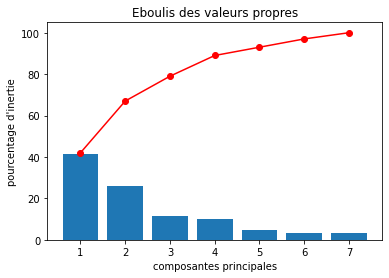

In [68]:
# On représente le pourcentage d'inertie expliquée par chaque composantes principales et la somme cumulée de ce pourcentage
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("composantes principales")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On observe sur le graphique ci-dessus, que les 3 premières composantes expliquent environ 80% de la variance.

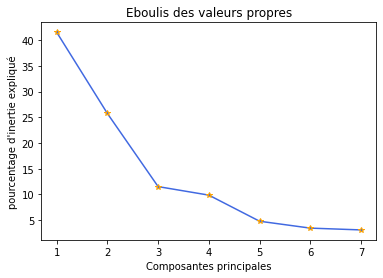

In [69]:
# Autre représentation permettant d'utiliser la méthode du coude
plt.plot(x_list, scree,c="royalblue",marker='*', markeredgecolor= "orange")
plt.xlabel("Composantes principales")
plt.ylabel("pourcentage d'inertie expliqué")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On observe un coude pour 3 composantes principales, ensuite le pourcentage d'inertie (ou de variance) expliqué diminue plus lentement. D'après nos deux graphiques il serait intéressant de ne retenir que les 3 premières composantes.
Cependant, dans le cadre de notre analyse, nous décidons de ne garder que les deux premières composantes. Pour ce faire, nous utilisons le critère de Kaiser qui indique qu'il est possible de ne pas considérer les composantes principales qui expliquent moins de variance que les variables initiales.

Critère de Kaiser: (100/p) en % avec p nombre de variables  

Avec 7 variables initiales le critère est de 14,3 % et la troisième variable n'explique qu'environ 11 % de la variance, ainsi on peut considérer seulement les deux premières composantes. Ces deux composantes explique environ 67 % de la variance.

In [70]:
# On relance une PCA mais pour 2 composantes principales
n_components = 2

# On instancie
pca = PCA(n_components= n_components)

# On entraine
pca.fit(X_scaled)

PCA(n_components=2)

In [71]:
# Coordonnées des variables sur le premier plan factoriel F1-F2
pcs = pca.components_
pcs

array([[-0.29044076,  0.40319711, -0.07399958,  0.22941773,  0.50678758,
         0.5088531 ,  0.4233234 ],
       [ 0.54878812,  0.24974454,  0.67335562, -0.29601724,  0.2372001 ,
        -0.04901012,  0.19172738]])

### Cercle des corrélations <a class="anchor" id="section_5_1"></a>

Nous pouvons maintenant tracer le cercle des corrélations et étudier les relations entre les variables initiales et nos composantes principales.

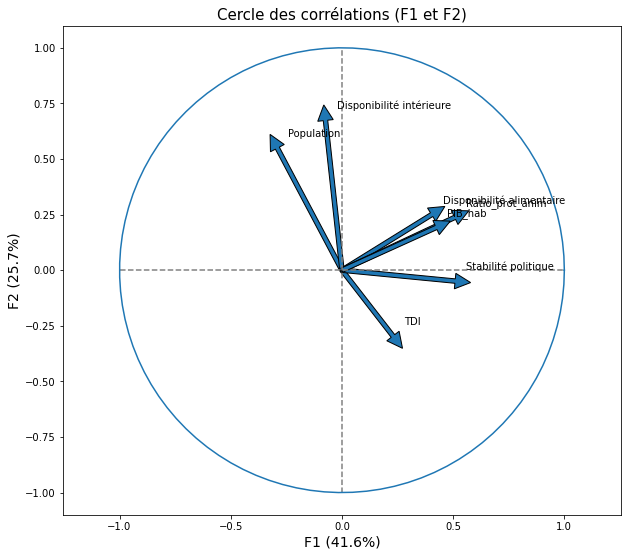

In [72]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pcs.shape[1]):
    ax.arrow(0,
             0,  # La flèche commence à l'origine
             pcs[0, i],  #0 for PC1
             pcs[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )
    
# On affiche le nom des variables
    plt.text(pcs[0, i] + 0.05,
             pcs[1, i] + 0.05,
             df_final.columns[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=14)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=14)

plt.title("Cercle des corrélations (F1 et F2)", fontsize=15)

# On ajoute le cercle unitaire
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an)) 
plt.axis('equal')
plt.show(block=False)

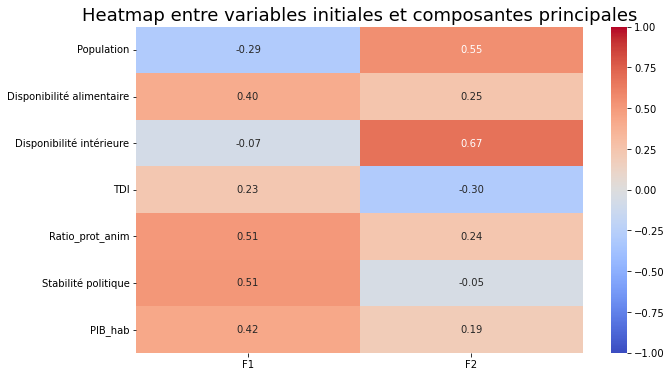

In [73]:
# On peut aussi visualiser les liens entre les variables initiales et F1 et F2 grâce à une heatmap
pcs = pd.DataFrame(pcs)

x_list = [1, 2]
pcs.columns = df_final.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

pcs.T

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title("Heatmap entre variables initiales et composantes principales", fontsize= 18)
plt.show()

### Observations  

-  Les variables Population et Disponibilité intérieure sont fortement corrélées positivement à F2.  
-  Les variables Disponibilité alimentaire, Ratio_prot_alim, PIB et Stabilité politique sont corrélées positivement à F1.
-  TDI est la variable la moins bien représentée sur le premier plan factoriel F1 F2.  

À partir de ces observations on peut définir **F2** comme représentant la **taille du marché**, plus un pays aura une coordonnée importante sur F2 plus sa population et sa disponibilité intérieure auront tendance à être élevés. Et **F1** comme la **situation politico-économique** (PIB_hab et Stabilité politique) et le **régime alimentaire** (Disponibilité alimentaire et Ratio_prot_anim).

Cela étant dit, on observe que les flèches des variables n'atteignent pas le cercle des corrélations, car le plan F1-F2 n'explique que 67 % de la variance. Il a y donc une perte d'information qui ne nous permet pas d'être catégorique concernant nos observations, ce sont plutôt des tendances.

In [74]:
df_scaled = pd.DataFrame(X_scaled, columns= df_final.columns, index= df_final.index)
df_scaled.head(3)

,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab
Pays,,,,,,,
Afrique du Sud,0.787957,1.153448,2.323763,-0.361568,0.077922,-0.295113,-0.422512
Albanie,-0.549078,0.167974,-0.511561,0.473774,0.740833,0.466064,-0.504824
Algérie,0.402091,-0.902456,-0.196677,-0.754278,-0.912866,-1.033224,-0.525535


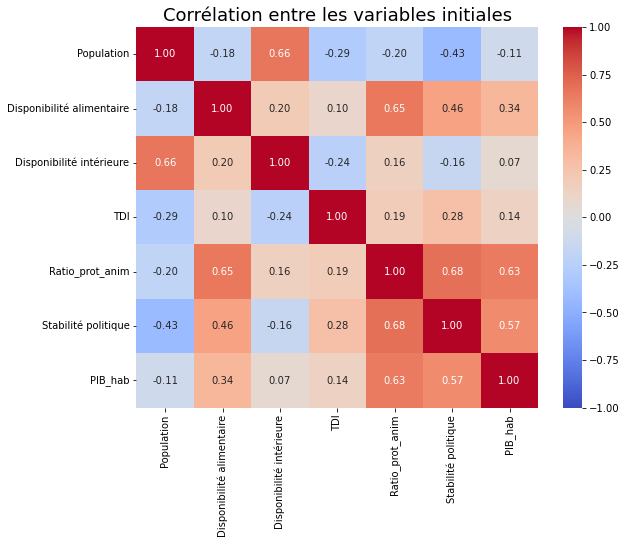

In [75]:
# On affiche une heatmap de la matrice de corrélation entre variables initiales
plt.figure(figsize=(9, 7))
sns.heatmap(df_scaled.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title("Corrélation entre les variables initiales", fontsize= 18)
plt.show()

Le cercle des corrélations nous permet de supposer que les variables dont les flèches (vecteurs) sont de taille similaire et forment un petit angle sont corrélés, à l'image des variables populations et disponibilité intérieures.  
Cette supposition est confirmée par la heatmap de corrélation ci-dessus, où l'on observe une corrélation positive entre population et disponibilité intérieure (0.66) et également entre les variables Disponibilité alimentaire, PIB_hab, Ratio_prot_anim et Stabilité politique.

### Projection du nuage des individus sur le plan F1-F2 <a class="anchor" id="section_5_2"></a>

On s'intéresse maintenant à nos pays, pour ce faire on projette le nuage de points représentant les pays, sur le premier plan factoriel F1F2.

In [76]:
# On applique la réduction de dimension à nos données centrées-réduites
X_proj = pca.transform(X_scaled)

# On converti en dataframe
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2"], index = df_final.index)
X_proj.head()

,F1,F2
Pays,,
Afrique du Sud,-0.308234,2.344178
Albanie,0.772648,-0.687989
Algérie,-1.850002,-0.180528
Allemagne,1.016507,2.488104
Angola,-0.985112,-0.674070


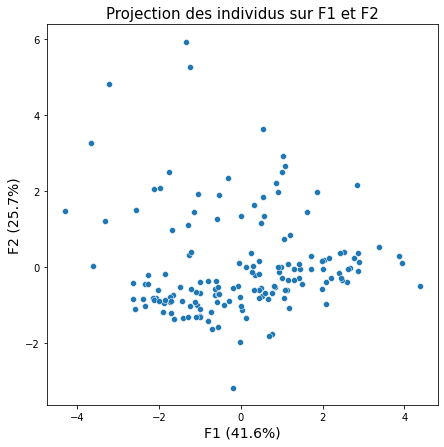

In [77]:
# On représente nos individus sur le premier plan factoriel
plt.figure(figsize=(7, 7))

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize= 14)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize= 14)

sns.scatterplot(data= X_proj, x="F1", y="F2", palette="muted")

plt.title("Projection des individus sur F1 et F2", fontsize=15)
plt.show()

**Sur F2** on a une **répartition des pays plutôt hétérogène** avec une zone dense pour des valeurs de F2 faibles et une zone plus dispersée pour des valeurs. D'après l'analyse du cercle des corrélations, les pays avec des valeurs élevées sur F2 représenteraient les plus gros marchés, c'est-à-dire des pays avec des populations et disponibilités intérieures importantes. À l'inverse on aurait des marchés comparativement plus petits dans la partie basse du plan. On aurait donc une majorité de marchés avec des tailles plutôt similaires et un nombre plus restreint de marchés de grande taille comparé au reste.

On observe une **répartition des pays plus homogène suivant l'axe F1**. Les pays situés dans la partie droite (valeurs positives sur F1), auraient tendance à avoir une bonne situation politico-économique et un régime alimentaire plus intéressant pour l'exportation de nos poulets. À l'inverse les pays situés dans la partie gauche (valeurs F1 négatives) seront moins pertinents pour approfondir une analyse de marché.

Il faut noter ici que nous généralisons, un pays situé positivement sur F1 ne signifie pas forcément qu'il a des valeurs importantes sur toutes les variables initiales qui sont corrélées à F1, c'est la combinaison de ces différentes valeurs qui donne un score élevé sur F1. 

## Exportation des données <a class="anchor" id="chapter6"></a>

In [78]:
# Sauvegarde des dataframe df_final, df_X_scaled et df_outliers au format csv
df_final.to_csv("C:/Users/jorda/P9/Data/df_final1.csv", sep=',')
df_X_scaled.to_csv("C:/Users/jorda/P9/Data/df_X_scaled.csv", sep=',')
df_outliers.to_csv("C:/Users/jorda/P9/Data/df_outliers.csv", sep=',')